In [12]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')
application_data=data[data.columns[0:6]]
application_data

--2023-06-11 19:57:18--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv.1’

seeds.csv.1         100%[===================>]   9.17K  --.-KB/s    in 0s      

2023-06-11 19:57:18 (82.4 MB/s) - ‘seeds.csv.1’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
0,15.26,14.84,0.8710,5.763,3.312,2.221
1,14.88,14.57,0.8811,5.554,3.333,1.018
2,14.29,14.09,0.9050,5.291,3.337,2.699
3,13.84,13.94,0.8955,5.324,3.379,2.259
4,16.14,14.99,0.9034,5.658,3.562,1.355
...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631
206,11.23,12.88,0.8511,5.140,2.795,4.325
207,13.20,13.66,0.8883,5.236,3.232,8.315
208,11.84,13.21,0.8521,5.175,2.836,3.598


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(data[data.columns[0:6]])

six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot

Principal Component Analysis- translate the higher-dimensional feature values into lower-dimensional coordinates.


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998],
       [ 0.04975325,  0.11432028],
       [-0.09938031, -0.27557236],
       [-0.13062753, -0.12970254],
       [-0.15462946, -0.12523441],
       [-0.17233814, -0.13131305],
       [-0.02126708, -0.18689759],
       [-0.10315113, -0.27180239],
       [ 0.23409894, -0.40314946],
       [ 0.05753928, -0.52836436],
       [-0.38360924, -0.06798852],
       [-0.10863786,  0.01920138],
       [-0.10733386, -0.12645048],
       [ 0.27237893, -0.41187202],
       [-0.48875922, -0.32450789],
       [ 0.07481607, -0.09670404],
       [ 0.30095947, -0.26136501],
       [-0.31813214, -0.06247802],
       [-0.37187081, -0.09589158],
       [-0.06952662,

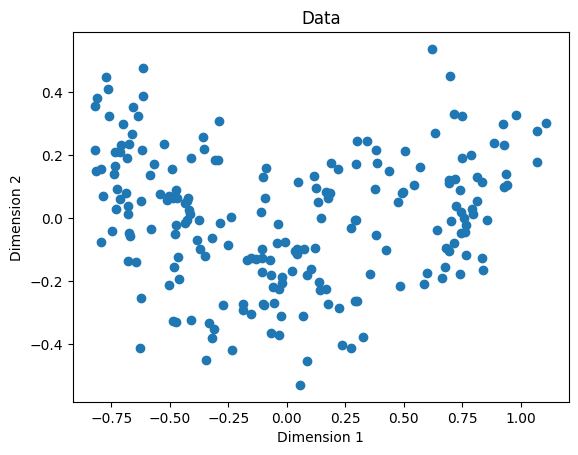

In [15]:
#visualizing features_2d
import matplotlib.pyplot as plt
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

finding number of clusters requiered to best fit the provided data by using Within Cluster Sum (WCS). Where steepest fall in WCS value will suggest the number of clustures


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

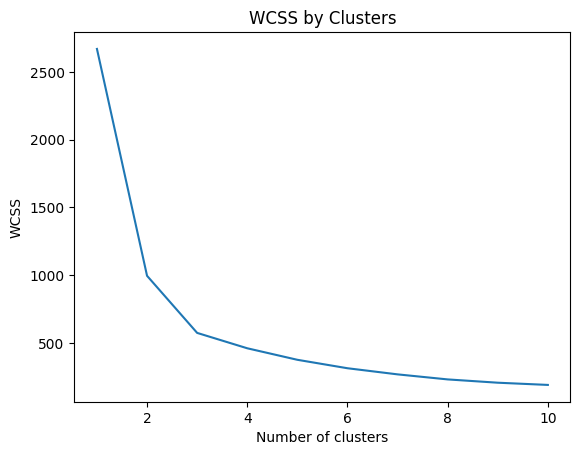

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(application_data.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

hence number of clusters will be 3

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(application_data.values)
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

designing function for ploting KNN

In [19]:
centeroids=kmeans.cluster_centers_
centeroids

array([[18.95454545, 16.38878788,  0.8868    ,  6.24748485,  3.74469697,
         2.72354545],
       [12.47125   , 13.52541667,  0.85635417,  5.29279167,  2.951375  ,
         4.77695833],
       [15.02470588, 14.63117647,  0.88192941,  5.62923529,  3.33264706,
         3.97617647],
       [12.554     , 13.534     ,  0.85962   ,  5.3227    ,  2.9937    ,
         7.0637    ],
       [13.93761905, 14.10428571,  0.8805    ,  5.44538095,  3.20019048,
         2.51605238],
       [12.1676    , 13.3168    ,  0.861768  ,  5.20052   ,  2.92624   ,
         2.78268   ],
       [19.58333333, 16.646     ,  0.88772667,  6.31586667,  3.83506667,
         5.08153333],
       [15.36090909, 14.79954545,  0.88109091,  5.68745455,  3.355     ,
         1.72818636],
       [16.88611111, 15.55722222,  0.87656667,  5.93683333,  3.5125    ,
         4.06      ],
       [11.1876    , 12.9408    ,  0.83964   ,  5.15132   ,  2.73544   ,
         4.98236   ]])

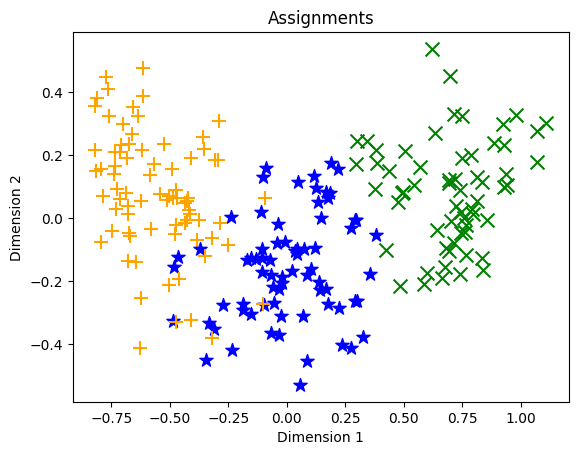

In [21]:
def plot(input_data,model_result):
      # creating dictionaries for distinct reprenstation of clusters 
      col_dic = {0:'blue',1:'green',2:'orange'}
      mrk_dic = {0:'*',1:'x',2:'+'}
      #accessing values from assigned dictionaries
      colors = [col_dic[x] for x in model_result]
      markers = [mrk_dic[x] for x in model_result]
      #creating centeroids
     
      for sample in range(len(model_result)):
          plt.scatter(input_data[sample][0], input_data[sample][1], color = colors[sample], marker=markers[sample], s=100)
      plt.xlabel('Dimension 1')
      plt.ylabel('Dimension 2')
      plt.title('Assignments')
      plt.show()

plot(features_2d, km_clusters)


0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: species, Length: 210, dtype: int64


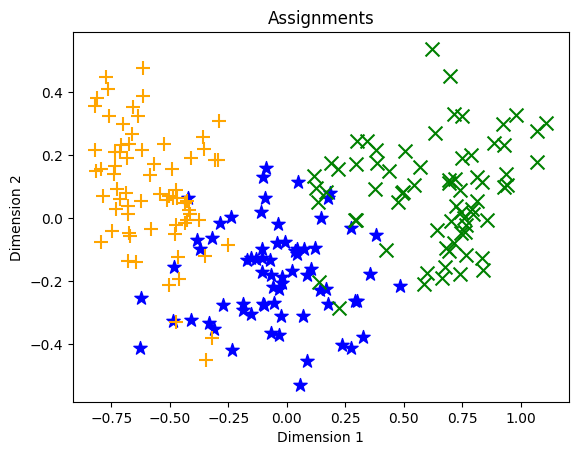

In [22]:
seed_species = data[data.columns[7]]
print(seed_species)
plot(features_2d, seed_species.values)